RANDOM FOREST

In [1]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('joined_cyberbullying_tweet.csv')

Before Hyperparamater Tuning: 
Training Accuracy:  0.9995715754598423
Testing Accuracy:  0.8185764880612362

Classification Report: 
                      precision    recall  f1-score   support

                age       0.97      0.97      0.97      1532
          ethnicity       0.97      0.98      0.97      1509
             gender       0.87      0.80      0.83      1479
  not_cyberbullying       0.62      0.44      0.52      1240
other_cyberbullying       0.55      0.75      0.63      1382
           religion       0.91      0.89      0.90      1611

           accuracy                           0.82      8753
          macro avg       0.82      0.81      0.80      8753
       weighted avg       0.83      0.82      0.82      8753



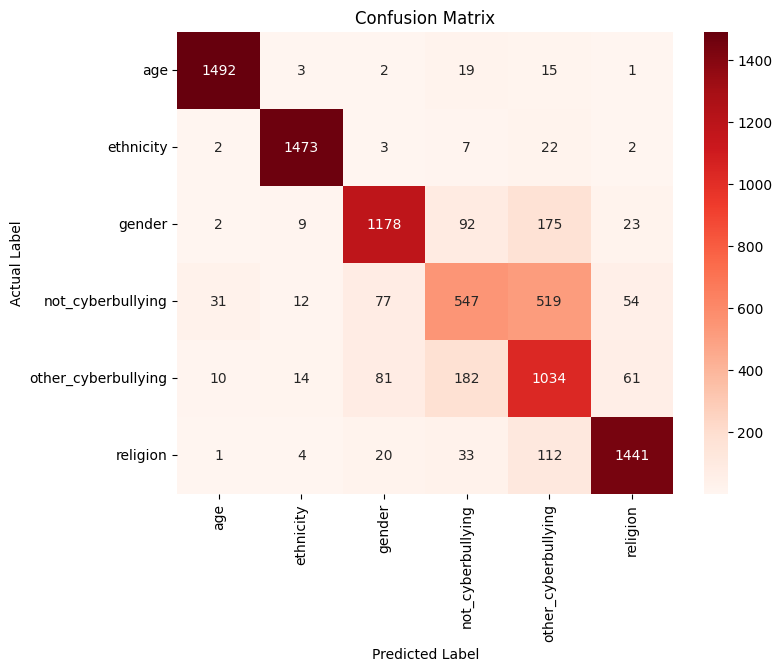

In [3]:
x = df['tweet_text']
y = df['cyberbullying_type']

# Label encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split dataset into 80% training and 20% testing data
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

# Fit the model
pipeline.fit(x_train, y_train)

# Prediction on training data
rf_train_y_pred = pipeline.predict(x_train)
# Prediction on testing data
rf_test_y_pred = pipeline.predict(x_test)

# Train and test accuracy
train_accuracy = accuracy_score(y_train, rf_train_y_pred)
test_accuracy = accuracy_score(y_test, rf_test_y_pred)

# Classification report
test_class_report = classification_report(y_test, rf_test_y_pred, target_names=label_encoder.classes_)

print("Before Hyperparamater Tuning: ")
print("Training Accuracy: ", train_accuracy)
print("Testing Accuracy: ", test_accuracy)
print("\nClassification Report: \n", test_class_report)

# Plot confusion matrix
test_conf_matrix = confusion_matrix(y_test, rf_test_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, cmap='Reds', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

##### Hyperparameter Tuning

In [4]:
# Hyperparameter tuning
rf_param = {
    'rf__n_estimators': [400, 500],
    'rf__max_depth': [None, 15, 20],
    'rf__max_features': ['sqrt', 'log2'],
    'rf__min_samples_split': [5, 10, 15],
    'rf__min_samples_leaf': [1, 2, 4],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, rf_param, cv=5, verbose=1, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Print the best parameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Mean Cross-validated Score:", grid_search.best_score_)



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'rf__max_depth': None, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 400}
Best Mean Cross-validated Score: 0.8339998816355809


In [5]:
# Tuned Random Forest
best_param = {
    'n_estimators': 400,
    'max_depth': None,
    'max_features': 'log2',
    'min_samples_split': 5,
    'min_samples_leaf': 1
}

# Tuned Random Forest pipeline
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=10000, ngram_range=(1,2))),
    ('rf', RandomForestClassifier(**best_param))
])

# Fit the model
pipeline.fit(x_train, y_train)

rf_train_y_pred = pipeline.predict(x_train)
rf_test_y_pred = pipeline.predict(x_test)

tuned_train_accuracy = accuracy_score(y_train, rf_train_y_pred)
test_accuracy = accuracy_score(y_test, rf_test_y_pred)
test_class_report = classification_report(y_test, rf_test_y_pred, target_names=label_encoder.classes_)

print("After Hyperparamater Tuning: ")
print("Train Accuracy: ", tuned_train_accuracy)
print("Test Accuracy: ", test_accuracy)
print("\nClassification Report: \n", test_class_report)

After Hyperparamater Tuning: 
Train Accuracy:  0.9973437678510225
Test Accuracy:  0.8268022392322633

Classification Report: 
                      precision    recall  f1-score   support

                age       0.96      0.97      0.97      1532
          ethnicity       0.98      0.98      0.98      1509
             gender       0.90      0.78      0.84      1479
  not_cyberbullying       0.61      0.50      0.55      1240
other_cyberbullying       0.58      0.73      0.65      1382
           religion       0.91      0.91      0.91      1611

           accuracy                           0.83      8753
          macro avg       0.82      0.81      0.82      8753
       weighted avg       0.83      0.83      0.83      8753

